In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/Housing.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
# Assume 'price' is the target variable
X = data.drop('price', axis=1)
y = data['price']



In [ ]:
# Identify categorical features and perform one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,1,0,0,0,1,0,0,0
93,7200,3,2,1,3,1,0,1,0,1,0,1,0
335,3816,2,1,1,2,1,0,1,0,1,0,0,0
412,2610,3,1,2,0,1,0,1,0,0,1,0,1
471,3750,3,1,2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,1,0,0,0,1,0,0,1
106,5450,4,2,1,0,1,0,1,0,1,1,1,0
270,4500,3,2,3,1,1,0,0,1,0,0,0,0
435,4040,2,1,1,0,1,0,0,0,0,0,0,1


In [ ]:
y_train

46     1
93     1
335    0
412    0
471    0
      ..
71     1
106    1
270    0
435    0
102    1
Name: price, Length: 436, dtype: int64

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]])

In [ ]:
X_test_scaled

array([[ 0.33875048,  1.39405543,  1.53917323, ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.61125674,  0.05527092,  1.53917323, ...,  1.80956067,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
         1.14854209, -0.67690027],
       ...,
       [ 0.38416819,  1.39405543,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [ 0.4295859 ,  0.05527092,  1.53917323, ...,  1.80956067,
        -0.870669  , -0.67690027]])

In [ ]:

# 1. Linear Regression model (as a baseline)
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

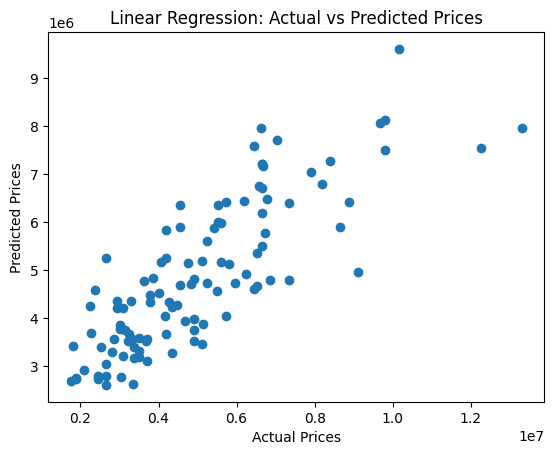

In [ ]:
linear_predictions = linear_model.predict(X_test_scaled)

# Create a scatter plot
plt.scatter(y_test, linear_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

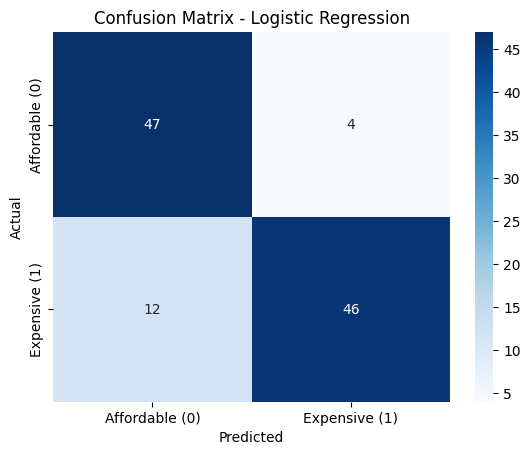

In [ ]:

# Visualize the Confusion Matrix using a heatmap
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Affordable (0)', 'Expensive (1)'],
            yticklabels=['Affordable (0)', 'Expensive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# Make predictions on the test set
linear_predictions = linear_model.predict(X_test_scaled)



In [ ]:
# Evaluate the performance
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression MSE: {linear_mse}')



Linear Regression MSE: 1754318687330.6677


In [ ]:
# 2. MLP (Multi-Layer Perceptron) using scikit-learn
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

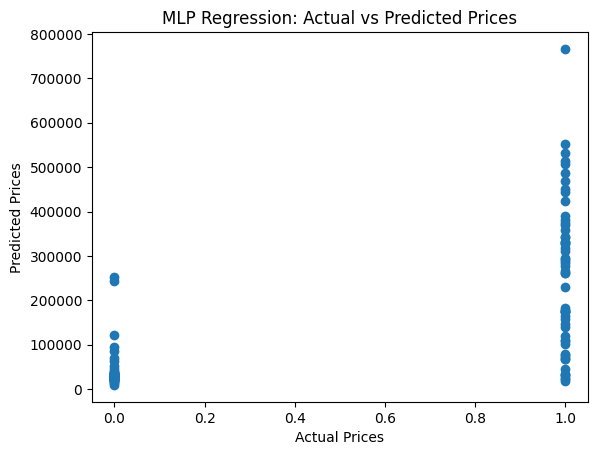

In [ ]:
mlp_predictions = mlp_model.predict(X_test_scaled)

# Create a scatter plot
plt.scatter(y_test, mlp_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('MLP Regression: Actual vs Predicted Prices')
plt.show()

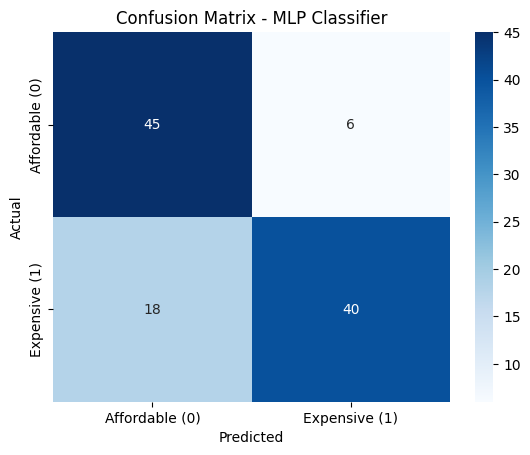

In [ ]:

# Make predictions on the test set
mlp_predictions = mlp_classifier.predict(X_test_scaled)


# Visualize the Confusion Matrix using a heatmap
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Affordable (0)', 'Expensive (1)'],
            yticklabels=['Affordable (0)', 'Expensive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()




In [ ]:
# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test_scaled)



In [ ]:
# Evaluate the performance
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f'MLP MSE: {mlp_mse}')



MLP MSE: 28027817222821.31


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))




In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)



Epoch 1/50
11/11 - 1s - loss: 0.2572 - val_loss: 0.2093 - 1s/epoch - 112ms/step
Epoch 2/50
11/11 - 0s - loss: 0.1370 - val_loss: 0.1859 - 77ms/epoch - 7ms/step
Epoch 3/50
11/11 - 0s - loss: 0.1181 - val_loss: 0.1810 - 72ms/epoch - 7ms/step
Epoch 4/50
11/11 - 0s - loss: 0.1037 - val_loss: 0.1737 - 86ms/epoch - 8ms/step
Epoch 5/50
11/11 - 0s - loss: 0.0942 - val_loss: 0.1706 - 90ms/epoch - 8ms/step
Epoch 6/50
11/11 - 0s - loss: 0.0867 - val_loss: 0.1769 - 88ms/epoch - 8ms/step
Epoch 7/50
11/11 - 0s - loss: 0.0825 - val_loss: 0.1724 - 82ms/epoch - 7ms/step
Epoch 8/50
11/11 - 0s - loss: 0.0744 - val_loss: 0.1718 - 74ms/epoch - 7ms/step
Epoch 9/50
11/11 - 0s - loss: 0.0699 - val_loss: 0.1754 - 92ms/epoch - 8ms/step
Epoch 10/50
11/11 - 0s - loss: 0.0629 - val_loss: 0.1785 - 85ms/epoch - 8ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0584 - val_loss: 0.1762 - 68ms/epoch - 6ms/step
Epoch 12/50
11/11 - 0s - loss: 0.0537 - val_loss: 0.1745 - 91ms/epoch - 8ms/step
Epoch 13/50
11/11 - 0s - loss: 0.0498

In [ ]:
# Evaluate the model on the test set
nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)
print(f'Neural Network MSE: {nn_mse}')

4/4 [==============================] - 0s 6ms/step
Neural Network MSE: 0.1815404556697086
